In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('../csv-data/drinks.csv')
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       170 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [5]:
df.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [6]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [7]:
df[:5]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [8]:
df.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [9]:
#컬럼 == 변수 == 특성(feature)
#속성(property, attribute) == entry
#열 == field (==item)

In [10]:
## 저장할 데이터의 컬럼을 선정하는 것이 중요!
## 컬럼을 재가공
## 피쳐 엔지니어링

In [11]:
## 컬럼간의 상관정도를 수치로 표현하여 컬럼간의 관계성을 고려해볼 수 있음.
## 상관도: 상관이 있는 정도
## 상관계수: 상관 정도가 수치로 표현된 것(corr())

In [12]:
## 상관<------->연관
## 상관: 관계가 있긴 있음을 나타내는 정도
## 연관: 관계가 있고, 하나가 다른 하나에 영향을 미치는 정도

In [13]:
# 상관도를 구할 떄 사용하는 방법
# 1) corr()함수를 이용
# 2) 그래프를 이용 = heatmape(), pairplot()

In [14]:
df[['wine_servings','beer_servings']].corr()

,wine_servings,beer_servings
wine_servings,1.000000,0.527172
beer_servings,0.527172,1.000000


In [15]:
#상관도를 구하고 나서 수치보는 법
# 0.7~1: 높은 상관관계
# 0.5~0.7: 중간 상관관계
# 0.3~0.5: 낮은 상관관계
# 0~0.3: 아주 낮은 상관관계
# 상관계수가 + 이면, 양의 상관관계
# 상관계수가 - 이면, 음의 상관관계

In [16]:
# wine, beer
# spirit : 증류수
# total_liters_of_pure_alcohol: 총 알콜 소비량


In [17]:
corr = df.corr()
corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


In [18]:
#살균제 양, 살균제 사용연령, 기후, 방의 크기, 살균제 사용 기간, 층의 높이, 사망여부
#기후, 층의 높이, 방의 크기: 상관이 없는 항목처럼 보임.
# 기후, 층, 방의 크기는 corr()을 구해보면 아주 낮은 상관도를 보임. (0.0001)

In [19]:
import seaborn as sns


In [20]:
cols = ['beer', 'spirit', 'wine', 'alcohol']

In [21]:
sns.set(font_scale=1.5)

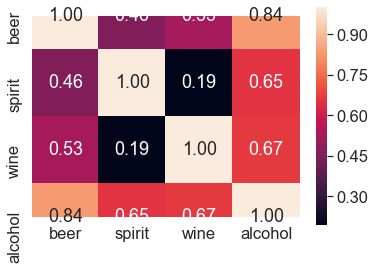

In [22]:
sns.heatmap(corr.values,
            cbar = True,
            annot=True,
            square=True,
            fmt='.2f',
            xticklabels=cols,
            yticklabels=cols
            
           )

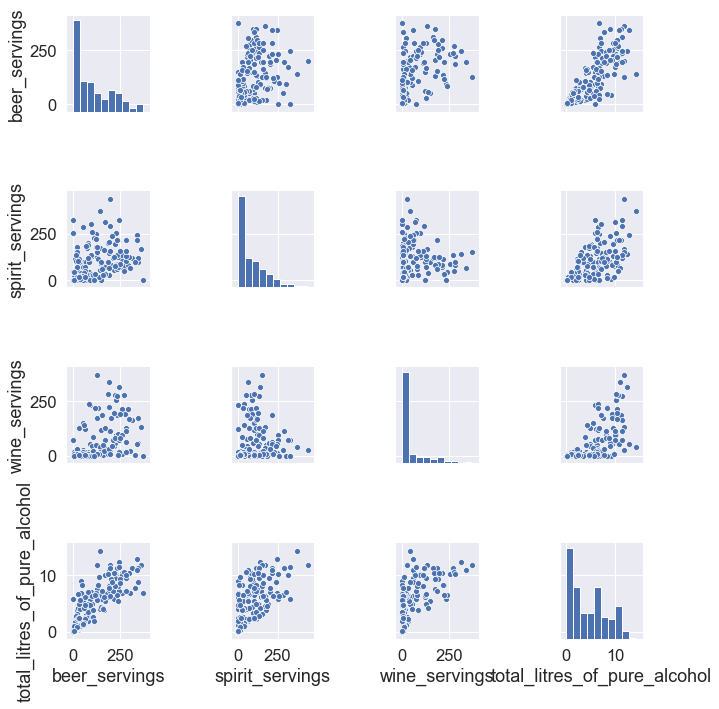

In [23]:
sns.pairplot(df, height=2.5)
plt.show()

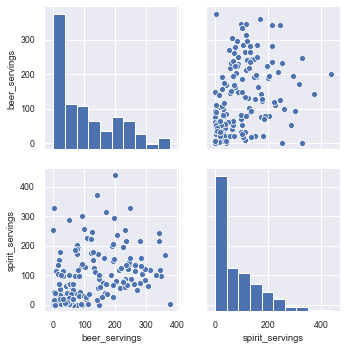

In [61]:
sns.pairplot(df[['beer_servings', 'spirit_servings']],height=2.5, )
plt.show()

In [25]:
df_t = sns.load_dataset('titanic')
df_t

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


C:\Users\hi\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\hi\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


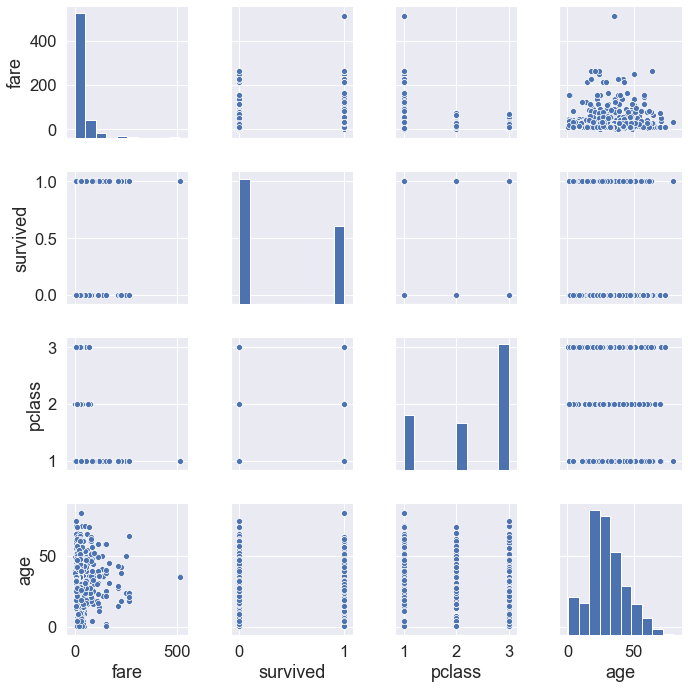

In [26]:
sns.pairplot(df_t[['fare', 'survived', 'sex', 'pclass', 'age']], height=2.5)
plt.show()

In [27]:
df_t[['survived', 'sex', 'pclass', 'age']]

,survived,sex,pclass,age
0,0,male,3,22.0
1,1,female,1,38.0
2,1,female,3,26.0
3,1,female,1,35.0
4,0,male,3,35.0
...,...,...,...,...
886,0,male,2,27.0
887,1,female,1,19.0
888,0,female,3,NaN
889,1,male,1,26.0


In [28]:
t_corr = df_t.corr()
t_corr

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [29]:
t_cols = ['survived', 'sex', 'pclass', 'age', 'fare']

In [30]:
sns.set(font_scale=0.8)

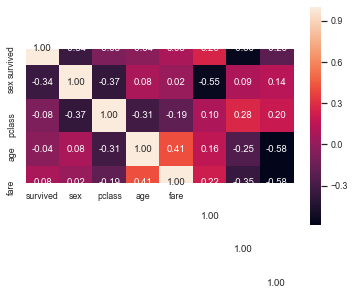

In [31]:
sns.heatmap(t_corr.values,
            cbar = True,
            annot=True,
            square=True,
            fmt='.2f',
            xticklabels=t_cols,
            yticklabels=t_cols
           )

In [32]:
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [33]:
df.sort_values('continent')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
192,Zimbabwe,64,18,4,4.7,AF
152,Seychelles,157,25,51,4.1,AF
150,Senegal,9,1,7,0.3,AF
95,Lesotho,82,29,0,2.8,AF
142,Rwanda,43,2,0,6.8,AF
...,...,...,...,...,...,...
143,St. Kitts & Nevis,194,205,32,7.7,NaN
144,St. Lucia,171,315,71,10.1,NaN
145,St. Vincent & the Grenadines,120,221,11,6.3,NaN
174,Trinidad & Tobago,197,156,7,6.4,NaN


In [34]:
# 대륙별 비율 파이차트로 구해보자
continent_count = df['continent'].value_counts()
continent_count

AF    53
EU    45
AS    44
OC    16
SA    12
Name: continent, dtype: int64

In [35]:
index = continent_count.index
values = continent_count.values

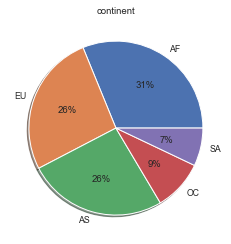

In [36]:
plt.pie(values, labels = index, autopct='%.0f%%', shadow=True)
plt.title('continent')
plt.show()

In [39]:
df['continent'].isna().sum()

23

In [103]:
print(df['continent'].isnull().sum())

23


In [105]:
df['continent'] = df['continent'].fillna('OT')
print(df['continent'].isnull().sum())

0


In [107]:
continent_count = df['continent'].value_counts()
continent_count

AF    53
EU    45
AS    44
OT    23
OC    16
SA    12
Name: continent, dtype: int64

In [108]:
index = continent_count.index
values = continent_count.values

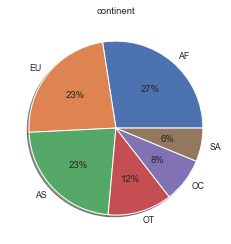

In [109]:
plt.pie(values, labels = index, autopct='%.0f%%', shadow=True)
plt.title('continent')
plt.show()

In [110]:
result = df.groupby('continent')['beer_servings'].sum()
result

continent
AF    3258
AS    1630
EU    8720
OC    1435
OT    3345
SA    2101
Name: beer_servings, dtype: int64

In [111]:
result = df.groupby('continent')['beer_servings'].mean()
result

continent
AF     61.471698
AS     37.045455
EU    193.777778
OC     89.687500
OT    145.434783
SA    175.083333
Name: beer_servings, dtype: float64

In [112]:
result = df.groupby('continent')['beer_servings'].min()
result

continent
AF     0
AS     0
EU     0
OC     0
OT     1
SA    93
Name: beer_servings, dtype: int64

In [113]:
result = df.groupby('continent')['beer_servings'].max()
result

continent
AF    376
AS    247
EU    361
OC    306
OT    285
SA    333
Name: beer_servings, dtype: int64

In [114]:
result = df.groupby('continent')['beer_servings'].agg(['sum', 'mean', 'min', 'max'])
result

,sum,mean,min,max
continent,,,,
AF,3258,61.471698,0,376
AS,1630,37.045455,0,247
EU,8720,193.777778,0,361
OC,1435,89.687500,0,306
OT,3345,145.434783,1,285
SA,2101,175.083333,93,333


In [115]:
#wine의 대륙별 합계, 평균, 최대를 구해보세요.
result = df.groupby('continent')['wine_servings'].agg(['sum', 'mean', 'max'])
result

,sum,mean,max
continent,,,
AF,862,16.264151,233
AS,399,9.068182,123
EU,6400,142.222222,370
OC,570,35.625000,212
OT,564,24.521739,100
SA,749,62.416667,221


In [118]:
## 전체 알콜 소비량 평균보다 많은 알코올을 섭취하는 대륙을 구해보세요
result = df.groupby('continent')['total_litres_of_pure_alcohol'].mean()
result

continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [119]:
total_mean = df['total_litres_of_pure_alcohol'].mean()
total_mean

4.717098445595855

In [131]:
result = result[result>total_mean]
result

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [132]:
result.idxmax() 
# result Series values중에서max값을 가지는 index를 추출

'EU'

In [ ]:
#맥주의 평균값을 구해보고,
# 맥주의 평균값보다 높은 대륙 리스트를 구해보세요.
# 맥주의 최대값을 가지는 대륙은 어디인가요?


In [133]:
#맥주의 평균\값을 구해보고,
df['beer_servings'].mean()

106.16062176165804

In [158]:
# 맥주의 평균값보다 높은 대륙 리스트를 구해보세요.
df.groupby('continent')['beer_servings'].mean()[df.groupby('continent')['beer_servings'].mean()>df['beer_servings'].mean()]

continent
EU    193.777778
OT    145.434783
SA    175.083333
Name: beer_servings, dtype: float64

In [168]:
df.groupby('continent')['beer_servings'].mean()[df.groupby('continent')['beer_servings'].mean()==df.groupby('continent')['beer_servings'].mean().max()]

continent
EU    193.777778
Name: beer_servings, dtype: float64

In [140]:
# 맥주의 최대값을 가지는 대륙은 어디인가요?
df[df['beer_servings']==df['beer_servings'].max()]['continent']

117    AF
Name: continent, dtype: object

In [128]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [130]:
## beer_servings가 200이상인 것들만 추출
df[df['beer_servings']>=200]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU
16,Belgium,295,84,212,10.5,EU
17,Belize,263,114,8,6.8,OT
23,Brazil,245,145,16,7.2,SA
25,Bulgaria,231,252,94,10.3,EU
32,Canada,240,122,100,8.2,OT
42,Croatia,230,87,254,10.2,EU


In [141]:
#맥주의 평균값보다 높은 나라 리스트 프린트
# 맥주의 평균값보다 높은 나라와 맥주의 소비량 프린트
# 맥주의 평균값보다 높은 나라 리스트의 갯수 프린트
df['beer_servings'].mean()

106.16062176165804

In [143]:
#맥주의 평균값보다 높은 나라 리스트 프린트
list(df[df['beer_servings']>df['beer_servings'].mean()]['country'])

['Andorra',
 'Angola',
 'Argentina',
 'Australia',
 'Austria',
 'Bahamas',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Bolivia',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Cabo Verde',
 'Cameroon',
 'Canada',
 'Chile',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Estonia',
 'Finland',
 'France',
 'Gabon',
 'Germany',
 'Greece',
 'Grenada',
 'Hungary',
 'Iceland',
 'Ireland',
 'Kazakhstan',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Mexico',
 'Namibia',
 'Netherlands',
 'New Zealand',
 'Niue',
 'Norway',
 'Palau',
 'Panama',
 'Paraguay',
 'Peru',
 'Poland',
 'Portugal',
 'South Korea',
 'Moldova',
 'Romania',
 'Russian Federation',
 'St. Kitts & Nevis',
 'St. Lucia',
 'St. Vincent & the Grenadines',
 'Serbia',
 'Seychelles',
 'Slovakia',
 'Slovenia',
 'South Africa',
 'Spain',
 'Suriname',
 'Sweden',
 'Switzerland',
 'Trinidad & Tobago',
 'Ukraine',
 'United Kingdom',
 'USA',
 'Uruguay',
 'Venezuela',
 

In [144]:
# 맥주의 평균값보다 높은 나라와 맥주의 소비량 프린트
df[df['beer_servings']>df['beer_servings'].mean()][['country', 'beer_servings']]

,country,beer_servings
3,Andorra,245
4,Angola,217
6,Argentina,193
8,Australia,261
9,Austria,279
...,...,...
182,United Kingdom,219
184,USA,249
185,Uruguay,115
188,Venezuela,333


In [151]:
# 맥주의 평균값보다 높은 나라 리스트의 갯수 프린트
len(list(df[df['beer_servings']>df['beer_servings'].mean()]['country']))

76

In [160]:
df[df['continent']=='AF']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
2,Algeria,25,0,14,0.7,AF
4,Angola,217,57,45,5.9,AF
18,Benin,34,4,13,1.1,AF
22,Botswana,173,35,35,5.4,AF
26,Burkina Faso,25,7,7,4.3,AF
27,Burundi,88,0,0,6.3,AF
28,Cote d'Ivoire,37,1,7,4.0,AF
29,Cabo Verde,144,56,16,4.0,AF
31,Cameroon,147,1,4,5.8,AF
33,Central African Republic,17,2,1,1.8,AF


In [41]:
#South Korea
df[df['country']=='South Korea']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
138,South Korea,140,16,9,9.8,AS


In [43]:
df[df['country']=='South Korea']['beer_servings']

138    140
Name: beer_servings, dtype: int64

In [46]:
df[['beer_servings', 'continent']][df['country']=='South Korea']

,beer_servings,continent
138,140,AS


In [47]:
df[df['country']=='South Korea'][['beer_servings', 'continent']]

,beer_servings,continent
138,140,AS


In [48]:
## 맥주 평균보다 한국의 소비량이 높은가?
## 얼마나 높은가?
df['beer_servings'].mean()

106.16062176165804

In [49]:
df[df['country']=='South Korea']['beer_servings']

138    140
Name: beer_servings, dtype: int64

In [53]:
df[df['country']=='South Korea']['beer_servings']>df['beer_servings'].mean()

138    True
Name: beer_servings, dtype: bool

In [55]:
int(df[df['country']=='South Korea']['beer_servings'])-df['beer_servings'].mean()

33.839378238341965

In [56]:
df[df['country']=='South Korea']['wine_servings']

138    9
Name: wine_servings, dtype: int64

In [57]:
df['wine_servings'].mean()

49.45077720207254

In [58]:
df[df['country']=='South Korea']['spirit_servings']

138    16
Name: spirit_servings, dtype: int64

In [59]:
df['spirit_servings'].mean()

80.99481865284974